<h1>This Notebook will serve as an introduction to Deep Learning</h1>


We will cover:
* What the heck is Deep Learning
* Build Intuition of the relationships between hyperparameters
* How to code one up
* Basics of the Photo-Z problem

In [38]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from evaluation import * #some visualization functions

<h3>Deep Learning is an ill-defined term. It functions as a pseudonym for one algorithem: the Artificial Neural Network</h3>

![Alt](./1.png "Title")


<h3>Artificial Neural Networks are a class of algorithem that take inspiration from Human Anatomy</h3>

![](./4.jpg)

<p>To summarize, Neurons are connected dendrite to axion, dendrite to axion, to form connections. These connections are called the synapse. Some stimulus (either a raw input or dendrite connection) will chemically transfer energy to the neuron. When the Neuron accumulates enough stimulus to overcome an activation barrier, the neuron potentiates: The nucleus sends a signal down the Myelin Sheeth that reaches the axion terminals. The axion terminals release chemicals called neurotransmitters, who quickly swim across brain fluid to the connected dendrite to stimulate the next neuron cell.</p>



![Alt](./2.png "Title")
 
In a similar fashion, Artificial Neural Networks mock this biology by creating small architectures of 'neuron cells' in layers. The most simple form, a Multi-Layer Perceptron (MLP) also known as a DenseNet, is a few layers of neurons who are maximally connected to the following layer

<h1>But What Exactly are these Neurons?</h1>

They can be summarized as:
<h1>$$ Output = A(\vec{W}\cdot \vec{I} + B)$$</h1>

With: 
* A() some activation function, more below
* W the weight
* B the bias
* I the input

Note: Each W and B are individual to each neuron, they are free parameters that are trained

Since each Neuron is connected to the next, the Outputs from each neuron are accumulated as the Input vector to the next!

The goal of Training is to find a set of $\vec{W}$ and $B$ that minimize some 'cost', or 'loss', or 'Liklihood' function

<h1>Optimizers</h1>

Gautham had a lecture on optimizers and the same rules apply here. The most simple optimizer is Stochastic Gradient Descent, which can be thought of as a ball rolling down an incline to find a minimum

![](./5.png "title")

But in general, improvements have been made to this for Deep Learning. To cut the story short, we will use the Adam Optimizer, which usually performs better. It is an adaptive algorithem that is similar to gradient descent, so for intuition just continue to think about balls and liklihood manifolds

One hyperparameter that is essential to understanding is the learning rate. The multiple arrows in the above diagram represent multiple training steps, and the size of each arrow is proportional to the derivative. That constant of proportionality is the learning rate, sometimes represented $\gamma$. A common choice for Adam is 1e-3. in General ANN performance is very sensitive to LR

<h1>Activation Functions</h1>

An activation function transforms the output. In our analogy to the human brain, activation functions are important barriers to noise: since synapses are imperfect, neurotransmitters can leak to other dendrites in small amounts. This is background noise that we would like our brain to be insenstive to, so we create a barrier function. Activations also can introduce non-linearities into our model to make them more complex. Activations typically are only functions of the weights, input, and Biases, so don't carry extra hyperparameters. BUT: the choice of activation is up to you, and is a hyperparameter!

Lets explore a few together:
![](./7.png)

In general, the ones that look more like a step function are better suited to categorization tasks, while the ones that are nonlinear and slow rising are better suited to regression tasks

<h1>Cost Functions</h1>

Cost functions are what we want to optimize, and, we've often called these negative log liklihood functions in class. Just like activations, some are better suited to categorization or optimiaztion. Its also possible to define your own.

Cost functions take as input the target value and the output value of the neural network and output a score. Minimizing this score is to train the network.

For instance, a simple cost function is Mean Squared Error: 
<h1>$$ MSE = \alpha (y_{true} - y_{output})^2 $$</h1>

For categorization, the categorical cross-entropy loss, or categorical log loss is favored:

IDk what that is, but its favored

<h1>General Algorithem</h1>

With this in mind the general algorithem for an artificial neural network is as follows:

* 1: Initialize everything, (dont worry Keras does this for us)

* 2: 'feedforeward': A batch of training objects are given to the model and evaluated to get an output

* 3: With an output and target values, the Loss function is evaluated

* 4: The optimizer takes derivatives of the loss function with respect to each parameter in the network (or whatever its going to do to optimize) You can think of this as a gigantic chain rule that establishes all connection to the network

* 5: Because the Last activation and layer will be the outermost functions in the Y_output value, these derivates are calculated first, then we can work our way inward This is called "Back Propogation"

* 6: With all derivatives calculated, our optimizer suggests an update, and we apply it

* 7: repeat steps 2-6 until convergence, or we run out of training data, or we begin to overtrain, or I get antsy

* 8 Publish

* 9 repeat steps 1-8 until I have a nobel prize

<h1>Overtraining and Regularizers</h1>

NOW I HEAR YOU SAYING:

but wait! if there are just a few maximally connected layer, each with their own weight and bias, then that means there may be million of free parameters! What about over training??

Quick and short: nah dont worry about it

What we will do is monitor our training with a held-out set of examples to evaluate the performance continuously on examples that the network has never seen before and can't adapt to. Then at the end we will choose the point where the best performance on the validation set was achieved.

Of course, that since we are the hand-selecting the optimized model on the first held out set (validation set) we will need another held out set (test set) to evaluate overall performance on at the end. **AND: we can not make any choice of optimization on this test set! or else we invalidate its usefulness!**

But there are other things we can do as well. It turns out the "dropping out" some connections randomly during each foreward pass and evaluation can force the network to make each connection more robust. Doing this introduces some error into the activation function to prevent overtraining. the fraction of layers to dropout is a hyperparameter.

<h1>Batch Size</h1>

Finally, there is one more hyperparameter that the network is very sensitive to: How many examples do we show the network at once? Originally, it was thought that showing th network one example at a time (mini-batching) would improve performance, and in some cases it does. However, in only showing the network one at a time, you allow the network to update on individual instead of global features, which may not be desirable. Additionally, since evaluating the network one at a time reduces parrelization speed, it will sickly increase our training time. However, more batches mean more memory that the network will take up in the machine, and at some point with millions parameters we will not have enough memory on laptops to train!

In summary: for Photo-Z generally one makes Batch size large (>10), but this doesn't have to be the case. Play with it. 

<h1>Great Lets Code</h1>

<h1>First lets grab some data and pre-process it by adding features and splitting our training set into train-validation-test sets</h1>

In [4]:
cols=['dered_u','dered_g','dered_r','dered_i','dered_z','dered_color_ug','dered_color_gr','dered_color_ri','dered_color_iz','dered_frac_uz','C']

In [9]:
#large dataset, don't grab all of it, only use columns we care about
X = pd.read_csv('C://Users//qwsaz//Photo_Z//DATA//SDSS_DR12_awe2_0.csv', usecols=cols)
#targets
Y = pd.read_csv('C://Users//qwsaz//Photo_Z//DATA//SDSS_DR12_awe2_0.csv',usecols=['z'])

In [10]:
#when I made this dataset I grabbed alot of sparse region data. Lets get back to a region where we have enough examples
X_cut_1 = X[ Y['z']<=0.4]
Y_cut_1 = Y[ Y['z']<=0.4]
#DY_cut_1 = DY[ Y['z']<=0.4]

<h1>Now create Holdout sets, lets all make sure to do this the same way!</h1>

I am also going to condense and convert the problem into a categorical one so I can do a trick later. I am simply binning the targets into 180 bins (bins size > Z_err) on the region 0<Z<0.4

Then, I am using a keras function to one-hot encode the categorical quantitiy to a vector of len(180), describing where the quantity is.

In [33]:
NB_BINS = 60 * 3
BATCH_SIZE = 64
ZMIN = 0.0
ZMAX = 0.4
BIN_SIZE = (ZMAX - ZMIN) / NB_BINS
range_z = np.linspace(ZMIN, ZMAX, NB_BINS + 1)[:NB_BINS]

In [17]:
x_train = X_cut_1.iloc[0:175000].values #175,000 train
y_train = tf.keras.utils.to_categorical(np.round((180-1)*(Y_cut_1.iloc[0:175000].values[:,0]/0.4),0).astype(int))
#y_train = Y_cut_1.iloc[0:175000].values[:,0]
#y_train = 1/((0.02)*np.sqrt(2*np.pi))*np.exp(-1*((range_z - np.ones((180))*y_train[:,np.newaxis])**2) * 1/(2*(0.02)**2))

x_val = X_cut_1.iloc[175000:300000].values #125,000 val
y_val_examine = (Y_cut_1.iloc[175000:300000].values[:,0])
y_val = tf.keras.utils.to_categorical(np.round((180-1)*(Y_cut_1.iloc[175000:300000].values[:,0]/0.4),0).astype(int))
#y_val = Y_cut_1.iloc[175000:300000].values[:,0]

x_test = X_cut_1.iloc[300000::].values #~200,000 test
y_test = tf.keras.utils.to_categorical(np.round((180-1)*(Y_cut_1.iloc[300000::].values[:,0]/0.4),0).astype(int))
#y_test = Y_cut_1.iloc[300000::].values[:,0]

<h1>Now lets define the architecture!<h1>

In [22]:
def MLP():
    IN = keras.layers.Input((11,))
    dense1 = keras.layers.Dense(45,activation=keras.activations.relu)(IN)
    drop1 = keras.layers.Dropout(0.05)(dense1)
    
    dense2 = keras.layers.Dense(45,activation=keras.activations.relu)(drop1)
    drop2 = keras.layers.Dropout(0.05)(dense2) #0.1
    
    dense3 = keras.layers.Dense(45,activation=keras.activations.relu)(drop2)
    drop3 = keras.layers.Dropout(0.05)(dense3)
    
    dense4 = keras.layers.Dense(45,activation=keras.activations.relu)(drop3)
    drop4 = keras.layers.Dropout(0.05)(dense4)#0.1
    
    dense5 = keras.layers.Dense(180,activation=keras.activations.softmax)(drop4)
    
    model = keras.Model(inputs=[IN],outputs=[dense5])
    return(model)

In [13]:
#This is also incredibly useful:
filepath='MLP_PDF_MODEL.hdf5' #what and where to save model as?

#Keras has functionalities called 'Call Backs' that can interact with the model during training

#This callback will save the model whenever the validation loss is lower than the last save!
ModelCheckpointCB = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
#This allows us to pick the model who has the best performance on our held out set!

#Another call back example changes the Learning rate on the fly, good for accelerated the fine grained optimization searches

#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.3, verbose=1, patience=2, min_lr=1e-8)

<h1>Alright lets call up our model then compile it</h1>

In [23]:
#model are stored in a model object, but the model still is missing a few parts! we need to assign an optimizer and loss!
mymodel = MLP()

In [15]:
#but before we do, lets take a peak at our model
mymodel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 45)                810       
_________________________________________________________________
dropout (Dropout)            (None, 45)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 45)                2070      
_________________________________________________________________
dropout_1 (Dropout)          (None, 45)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 45)                2070      
_________________________________________________________________
dropout_2 (Dropout)          (None, 45)                0     

In [24]:
#Optimizer definition is Easily done with Keras!
adam = tf.keras.optimizers.Adam(lr=3e-4) #there are other optimizer hyperparameters, but Adam is good with base values
#and a loss function, then in our compile call we actually instantiate all the variables. This will let us know if we have
#enough memory to train or not.
mymodel.compile(optimizer=adam, loss='categorical_crossentropy') #can also define our own or check out them in the docs

<h1>We are ready to train!<h1>

In [26]:
history = mymodel.fit(x=x_train,
                      y=y_train,
                      batch_size=32, #this is important
                      epochs=5, #this says how many times will we show our training set?
                      verbose=1, 
                      validation_data=(x_val,y_val), #here we palce our held out set, Keras will evaluate 1/epoch
                      callbacks=[ModelCheckpointCB])

Train on 175000 samples, validate on 125000 samples
Epoch 1/5
174848/175000 [============================>.] - ETA: 0s - loss: 3.7257
Epoch 00001: val_loss improved from 3.78577 to 3.65107, saving model to MLP_PDF_MODEL.hdf5
175000/175000 [==============================] - 27s 156us/sample - loss: 3.7257 - val_loss: 3.6511
Epoch 2/5
174880/175000 [============================>.] - ETA: 0s - loss: 3.6966
Epoch 00002: val_loss did not improve from 3.65107
175000/175000 [==============================] - 25s 144us/sample - loss: 3.6967 - val_loss: 3.7196
Epoch 3/5
174816/175000 [============================>.] - ETA: 0s - loss: 3.6763
Epoch 00003: val_loss improved from 3.65107 to 3.59159, saving model to MLP_PDF_MODEL.hdf5
175000/175000 [==============================] - 26s 147us/sample - loss: 3.6762 - val_loss: 3.5916
Epoch 4/5
174784/175000 [============================>.] - ETA: 0s - loss: 3.6576
Epoch 00004: val_loss did not improve from 3.59159
175000/175000 [=====================

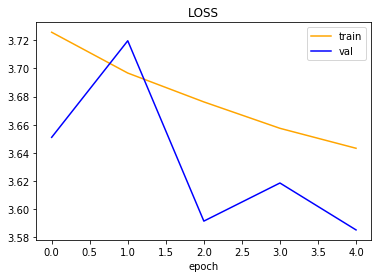

In [28]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
itera = np.arange(0,5,1)
plt.plot(itera,train_loss,'orange',label='train')
plt.plot(itera,val_loss,'blue',label='val')
#plt.xscale('log')
plt.title('LOSS')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [30]:
#load weights from best performing epoch:
mymodel.load_weights(filepath)

In [31]:
y_pred = mymodel.predict(x_val)

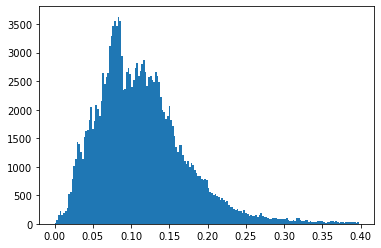

In [34]:
bins,values,something = plt.hist(np.sum(y_train*range_z,1),bins=range_z)
plt.title('true distribution')
plt.show()

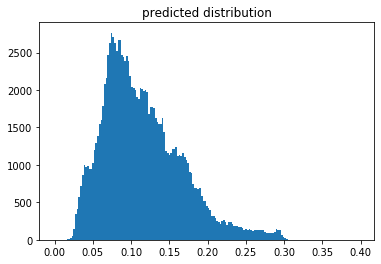

In [35]:
plt.hist(np.sum(y_pred*range_z,1),bins=range_z) #for cateogiral
plt.title('predicted distribution')
#plt.hist(y_pred,bins=range_z) #for regression
plt.show()

(125000,)
CRPS:  0.0861
MAD:  0.0157
bias:  -0.0035
outlier_fraction_eta pasquet:  0.0021
RMS:  0.021
outlier fraction LSST:  0.0118


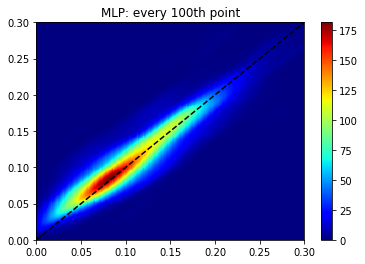

(125000,)
(125000,)
(125000, 180)


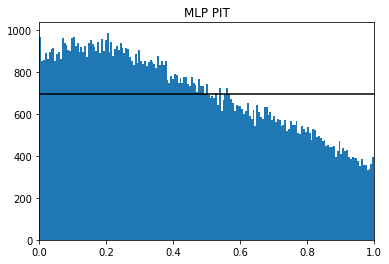

0.000712
 
Normal distribution's fraction is 0.0002


In [39]:
from scipy.stats import kde
x=y_val_examine
y=np.sum(range_z*y_pred,1) #for categorical
#y=y_pred[:,0] #for regression


#CRPS, FOR CLASS ONLY:
z_bins = np.argmax(y_val,axis=1)
CRPS=np.zeros(len(y_val))
for i in range(len(CRPS)):
    CRPS[i] = (np.sum((np.cumsum(y_pred[i,0:z_bins[i]]))**2) + np.sum((np.cumsum(y_pred[i,z_bins[i]::])-1)**2)) * BIN_SIZE
print(np.shape(CRPS))
CRPS_estimator=np.mean(CRPS)

#summary stats
residuals = (x-y)/(1+x)
bias = np.mean(residuals)
MAD = 1.4826*np.median(abs(residuals - np.median(residuals)))
outlier_fraction_eta = len(residuals[residuals > 5*MAD])/len(residuals)
eta_LSST = len(residuals[residuals > 3*MAD*(1+residuals)])/len(residuals)
RMS = np.sqrt(np.mean(np.square(residuals)))
print('CRPS: ',round(CRPS_estimator,4))
print('MAD: ',round(MAD,4))
print('bias: ',round(bias,4))
print('outlier_fraction_eta pasquet: ',round(outlier_fraction_eta,4))
print('RMS: ',round(RMS,4))
print('outlier fraction LSST: ',round(eta_LSST,4))
#KDE plot
nbins=300
x=x[::100]
y=y[::100]

k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[0:0.4:nbins*1j, 0:0.4:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='jet')
plt.plot([0,1],[0,1],'k--')
plt.xlim(0,0.3)
plt.ylim(0,0.3)
plt.title('MLP: every 100th point')
plt.colorbar()
plt.show()

PIT(y_val_examine,y_pred,'MLP PIT')